### Partial Differential Equations 3: Exercise sheet 5

These practice questions are similar to the exercises in the textbook and in Schaum's outlines Partial Differential Equations. If you are having difficulties with these questions practice using the remaining questions from these exercise. You will get the best from this tutorial by working though these examples __before__ the tutorial and asking your tutors to help you with questions with which you are having problems.
\
\
__Q1__
(From exercise 9.4.3 of Advanced Modern Engineering Mathematics)

a) Use the method of separated solutions to solve the 1-d heat conduction equation

\begin{align}
\frac{\partial u(x,t)}{\partial t} &= \kappa\frac{\partial^2 u(x,t)}{\partial x^2} & (1)
\end{align}

in the region $0\le x\le1$ and $t\ge0$ with the following boundary conditions

\begin{align}
\frac{\partial u(0,t)}{\partial x} &= 0, & t\ge0 && (2)\\
u(1, t) &= 0, & t\ge0 && (3) \\
u(x, 0) &= a\cos{(\pi x)}\cos{(\pi x/2)}, & 0 \le x \le 1 && (4)
\end{align}

You might want to use the identity

\begin{align}
\cos{\theta_1}\cos{\theta_2} = (\cos{(\theta_1 -\theta_2)} + \cos{(\theta_1 + \theta_2)})/2 && (5)
\end{align}
\
\
\
__Solution__

First, we should find the long time or steady-state solution and subtract that from the main problem. We know that at steady-state the left-hand side of (1) is zero, which in turn means (from the right-hand-side of (1)) that solutions must have zero curvature in $x$ as $t \rightarrow \infty$, i.e. a fixed gradient in $x$. If we look at boundary condition (2), we see that at $x=0$ the solution has zero gradient. Thus, the steady state solution must have zero gradient in $x$ for $0 \leq x \leq 1$. If we look at boundary condition (3) we see that the solution is fixed at $0$ for $x=1$. Thus, the steady-state solution is $u=0$ for $0 \leq x \leq 1$.

Therefore, in this particular case, subtracting the steady-state solution has no effect and we can now concentrate on solving the transient problem, which is the same as the original problem.

From the lectures or the book we know that the following three functions

\begin{align}
u_1(x,t) =& (Ax+B) e^{\mu\kappa t}, & \mu = 0 && (6) \\
u_2(x,t) =&\left(Ae^{\lambda x}+Be^{-\lambda x}\right) e^{\mu\kappa t}, & \mu=\lambda^2 \gt 0 && (7) \\
u_3(x,t) =& (A\cos{(\lambda x)}+B\sin{(\lambda x)}) e^{\mu\kappa t}, & \mu=-\lambda^2 \lt 0 && (8)
\end{align}

are possible solutions for the 1-d heat equation.

We need to go through the boundary conditions to find which of these three functions is a solution to the particular problem and to find the values for the parameters, i.e. $A$, $B$ and $\mu$. We need to take the first partial derivatives of (6)-(8) for boundary condition (2)

\begin{align}
\frac{\partial u_1(0,t)}{\partial x} =& A, & \mu = 0 && \\
\frac{\partial u_2(0,t)}{\partial x} =& \lambda (A-B) e^{\mu\kappa t}, & \mu=\lambda^2 \gt 0 && \\
\frac{\partial u_3(0,t)}{\partial x} =& \lambda B e^{\mu\kappa t}, & \mu=-\lambda^2 \lt 0 && (8)
\end{align}

Clearly, $u_1$ cannot satisfy boundary condition (2), while $u_2$ would generate an unbounded solution as $t\rightarrow\infty$ unless $A=B$. For $u_3$ we require $B=0$.

Now consider boundary condition (3). Solution $u_2$ will generate an unbounded solution except for $x=0$ and must be discarded. Solution $u_3$ with boundary condition (3) and $B=0$ is

\begin{align}
u_3(1,t) =& A\cos(\lambda) e^{\mu\kappa t} \overset{!}{=} 0, & \mu=-\lambda^2 \lt 0
\end{align}

which is satisfied when $\lambda = (N+0.5)\pi$ for $N=0,1,2,\dots$. We can superpose solutions to get

\begin{align}
u(x,t) =& \sum^{\infty}_{N=0} A_N \cos{((N+0.5)\pi x)} e^{-\left((N+0.5)\pi\right)^2 \kappa t}, & 0 \le x \le 1 && (9)
\end{align}

To satisfy boundary condition (4) we require

\begin{align}
u(x,0) = \sum_{N=0}^\infty A_N \cos{((N+0.5)\pi x)}\overset{!}{=}a\cos{(\pi x)}\cos\left({\frac{\pi x}{2}}\right), && 0 \le x \le 1
\end{align}

Using identity (5) this becomes

\begin{align}
u(x,0) = \sum_{N=0}^\infty A_N \cos{((N+0.5)\pi x)}\overset{!}{=}\frac{a}{2}\left(\cos{\left(\frac{\pi x}{2}\right)}+\cos{\left(\frac{3\pi x}{2}\right)}\right), && 0 \le x \le 1
\end{align}

which is satisfied by $A_0$ = $A_1$ = a/2 and $A_N = 0$ for $N\ge 2$. 

The complete solution is

\begin{align}
u(x,t) =& \frac{a}{2}\left(
\cos{\left(\frac{\pi x}{2}\right)} e^{-\left(\frac{\pi^2}{4}\right) \kappa t}+
\cos{\left(\frac{3\pi x}{2}\right)} e^{-\left(\frac{9\pi^2}{4}\right) \kappa t}
\right), & 0 \le x \le 1
\end{align}


b) Use Python to plot the solution.

__Solution__

The Python script is the same as for Exercise sheet 5 with the exception of a different function definition and different solution domain.

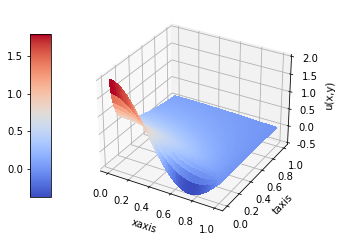

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator , FormatStrFormatter
import numpy as np
# Solution to the 1-d heat conduction equation
# Set the x and t grid points and the meshgrid
N = 100
x = np.linspace(0,1,N)
t = np.linspace(0,1,N)
X,T = np.meshgrid(x,t)
# Define the function and generate the output on the meshgrid
a = 2
kappa = 1
pkt = np.pi*np.pi*kappa/4
Z = 0.5*a*((np.cos(0.5*np.pi*X)*np.exp(-pkt*T)) + (np.cos(1.5*np.pi*X)*np.exp(-9*pkt*T)))
# Generate the plot
fig = plt.figure()
ax = plt.axes(projection='3d')
# Plot the surface
surf = ax.plot_surface(X,T,Z,cmap=cm.coolwarm,linewidth=0,antialiased=False)
# Customize the z axis
ax.set_zlim(-0.5,2)
ax.zaxis.set_major_locator(LinearLocator(6))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f'))
ax.set_xlabel('xaxis')
ax.set_ylabel('taxis')
ax.set_zlabel('u(x,y)')
# Add a color bar which maps values to colors
fig.colorbar(surf,shrink=0.75,aspect=8,location="left")
plt.show()